# Исследование публикаций о продаже квартир (Research of publications about the sale of apartments)

## Описание проекта

В распоряжении имеются данные сервиса Яндекc.Недвижимость, а именно объявления о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

**Цель проекта:** установить параметры, которые влияют на рыночную стоимость объектов недвижимости, а также их степень влияния.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Этапы исследования:**

* Изучение данных
* Предобработка данных
* Расчёты и добавление результатов в таблицу
* Исследовательский анализ данных
* Общий вывод

## Изучение данных из файла

Импортируем библиотеки, которые будем использовать в исследовании

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Загрузим данные и получим информацию о данных. Создадим функцию `df_read_csv`, которая выведит сообщение об ошибке, если информация о файле будет указана неверно

In [2]:
def df_read_csv(path, sep='\t'):
    try:
        return pd.read_csv(path, sep)
    except Exception:
        print('Ошибка при загрузке файла')
df = pd.read_csv('real_estate_data.csv', sep='\t') 
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Выведим список характерных значений для каждого столбца.

In [3]:
df.describe() # список характерных значений

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В таблице 22 столбца. Типы данных в столбцах разные — `object`, `int`, `float`, `bool`.

Согласно документации к данным:
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

### Вывод

В каждой строке таблицы — данные о продаже квартир. В данных встречаются пропуски, а также другие аномалии.
Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

### Поиск и работа с пропущенными значениями

На этом этапе необходимо обработать пропущенные значения в данных, а также другие аномалии.

Проверим все столбцы методом `value_counts()` на уникальные значения. Среди всех столбцов выделим те, где можно заметить аномалии.

In [4]:
df['rooms'].value_counts() # количество уникальных значений в столбце 

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

In [5]:
df[df['rooms'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.00,1,NaN,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,NaN,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.30,19,NaN,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,NaN,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,NaN,25.0,18.00,16,NaN,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28T00:00:00,0,NaN,24.0,18.00,4,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,NaN,19.0,NaN,8,NaN,...,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11T00:00:00,0,NaN,9.0,18.00,8,NaN,...,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


В столбце `rooms` есть 197 значений 0. Скорее всего, посмотрев на столбцы `total_area` и `living_area` можно предположить, что это могут быть студии. Оставим столбцы без изменения.

В столбце `ceiling_height` были пропущены значения. Проверим долю пропущенных значений от общего количества.

In [6]:
display(df[df['ceiling_height'].isna()].head(5)) # вывод 5 строк таблицы с пропущенными значениями в столбце ceiling_height
df['ceiling_height'].isna().mean() # доля пропущенных значений в ceiling_height

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0


0.38799105447487237

Видно, что пропущено 38% значений. Необходимо их заменить. Из метода `describe()` минимальное и максимальное значения различаются в два порядка. Медиана менее чувствительна к выбросам, чем среднее арифметическое, поэтому пропущенные значения заполним медианными, причем `rooms` можно учесть при вычислении медианы.

In [7]:
df['ceiling_height'] = df['ceiling_height'].fillna(df.groupby('rooms')['ceiling_height'].transform('median')) # заполнение пропусков в ceiling_height по группам в rooms

Также необходимо заменить аномалии в значениях. Высота потолков менее 2 м и более 5 м выглядят странно. Посчитаем количество тах значений.

In [8]:
print(len(df[df['ceiling_height'] >= 5])) # количество значений в столбце ceiling_height с условием >= 5
len(df[df['ceiling_height'] < 2]) # количество значений в столбце ceiling_height с условием < 2

37


3

Значений оказалось 3 и 37, соответственно. Их замена незначительно повлияет на результат, но все равно заменим эти значения на медианные.

In [9]:
ceiling_height_median = df['ceiling_height'].median() # среднее значение 
df.loc[df['ceiling_height'] >= 5, 'ceiling_height'] = ceiling_height_median #замена значений на среднее
df.loc[df['ceiling_height'] < 2, 'ceiling_height'] = ceiling_height_median #замена значений на среднее

Посчитаем долю пропущенных значений в столбце `floors_total`.

In [10]:
df['floors_total'].isna().mean() # доля пропущенных значений в floors_total

0.0036288450989493226

0.3% - незначительное количество пропусков. Удалим строки, где значения `floors_total` пропущены.

In [11]:
df = df.dropna(subset=['floors_total']) # удаление пропущенных строк, где floors_total пропущено

В столбце `living_area` пропущены значения. Проверим долю пропущенных значений от общего количества.

In [12]:
print(df['living_area'].isna().mean()) # доля пропущенных значений в living_area
display(df[df['living_area'].isna()].head(5)) # вывод 5 строк таблицы с пропущенными значениями в столбце living_area

0.07919366450683946


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.60,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.64,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.64,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN


Видно, что пропущено 7% значений. Необходимо их заменить. Сделаем это аналогично заполнению в столбце `ceiling_height`.

In [13]:
df['living_area'] = df['living_area'].fillna(df.groupby('rooms')['living_area'].transform('median')) # заполнение пропусков в living_area по группам в rooms

В столбце `kitchen_area` пропущены значения. Проверим долю пропущенных значений от общего количества.

In [14]:
print(df['kitchen_area'].isna().mean()) # доля пропущенных значений в kitchen_area
display(df[df['kitchen_area'].isna()].head(5)) # вывод 5 строк таблицы с пропущенными значениями в столбце kitchen_area

0.09448185321644857


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,45.0,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.64,9.0,17.6,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,30.5,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.64,22.0,17.6,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,2.64,13.0,17.6,13,NaN,...,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0


Видно, что пропущено 9% значений. Необходимо их заменить. Сделаем это аналогично заполнению в столбцам `ceiling_height` и `living_area`.

In [15]:
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby('rooms')['kitchen_area'].transform('median')) # заполнение пропусков в kitchen_area по группам в rooms

В столбце `balcony` есть пропущенные значения. Можно предположить, что отсутствие значения означает отсутствие балкона. Заменим попуски на 0.

In [16]:
df['balcony'] = df['balcony'].fillna(0) # заполнение пропусков в balcony на 0
print(df['balcony'].value_counts()) # количество уникальных значений в столбце

0.0    15193
1.0     4195
2.0     3657
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64


Посчитаем долю пропущенных значений в `locality_name`.

In [17]:
print(df['locality_name'].isna().mean()) # доля пропущенных значений в locality_name
display(df[df['locality_name'].isna()].head(5)) # вывод 5 строк таблицы с пропущенными значениями в столбце locality_name

0.002032778554186253


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.8,2,NaN,...,8.8,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,2.65,4.0,42.6,2,NaN,...,18.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,2.64,24.0,15.6,3,NaN,...,10.7,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,2.60,24.0,33.1,21,NaN,...,8.2,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,2.60,5.0,30.8,5,NaN,...,6.5,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0


Пропущенных значений - 0.2%. Это небольшое количество. Данные в этом столбце являются категориальными, обоснованной замены сложно выбрать. Оставим этот столбец без изменения.

Посчитаем долю пропущенных значений в `days_exposition`.

In [18]:
print(df['days_exposition'].isna().mean()) # доля пропущенных значений в days_exposition
display(df[df['days_exposition'].isna()].head(5)) # вывод 5 строк таблицы с пропущенными значениями в столбце days_exposition

0.13433278278914157


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.60,24.0,30.5,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.64,22.0,17.6,3,NaN,...,9.0,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.6,2018-12-02T00:00:00,2,2.65,9.0,30.3,7,NaN,...,7.0,0.0,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.1,2019-01-31T00:00:00,2,2.60,24.0,29.7,9,NaN,...,8.3,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN


Получилось 13% пропущенных значений. Удалять эти строки нельзя. Данный столбец неоходим для дальнейшего исследования. Если заполнить его, то можно существенно повлиять на результат. Оставим пустые значения, т.к. не хотим исказить выводы.

Проверим наличие явных дубликатов в данных.

In [19]:
df.duplicated().sum() # всего явных дубликатов

0

Явных дубликатов в данных нет.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23612 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23613 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          23419 non-null  float64
 13  balcony               23613 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Часть пропусков в столбцах, о которых не говорили выше остались. Данные в столбцах `is_apartment`, `airports_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` не важны для исследования. С необходимыми данными и их преобразованием в столбце `cityCenters_nearest` будем работать ниже.   

### Изменение типа данных

Поменяем в некоторых столбцах тип данных. Изменим в столбце `first_day_exposition`, так как эти данные отражают дату и время, для этого есть специальный тип данных `datetime`. Также изменим в столбцах, где значения являются целыми, но тип данных для них `float`, заменим на `int`.

In [21]:
# Изменения типа данных
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') 
df['last_price'] = df['last_price'].astype('int')
df['floors_total'] = df['floors_total'].astype('Int64')
df['balcony'] = df['balcony'].astype('int')
df['airports_nearest'] = df['airports_nearest'].astype('Int64')
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype('Int64')
df['parks_around3000'] = df['parks_around3000'].astype('Int64')
df['parks_nearest'] = df['parks_nearest'].astype('Int64')
df['ponds_around3000'] = df['ponds_around3000'].astype('Int64')
df['ponds_nearest'] = df['ponds_nearest'].astype('Int64')
df['days_exposition'] = df['days_exposition'].round()
df['days_exposition'] = df['days_exposition'].astype('Int64')

In [22]:
df['total_area'] = df['total_area'].astype('float32')
df['living_area'] = df['total_area'].astype('float32')
df['kitchen_area'] = df['total_area'].astype('float32')
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  int32         
 2   total_area            23613 non-null  float32       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        23612 non-null  float64       
 6   floors_total          23613 non-null  Int64         
 7   living_area           23613 non-null  float32       
 8   floor                 23613 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          23613 non-null  float32       
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.000000,2019-03-07,3,2.70,16,108.000000,8,NaN,...,108.000000,0,Санкт-Петербург,18863,16028,1,482,2,755,<NA>
1,7,3350000,40.400002,2018-12-04,1,2.64,11,40.400002,1,NaN,...,40.400002,2,посёлок Шушары,12817,18603,0,<NA>,0,<NA>,81
2,10,5196000,56.000000,2015-08-20,2,2.60,5,56.000000,4,NaN,...,56.000000,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159.000000,2015-07-24,3,2.65,14,159.000000,9,NaN,...,159.000000,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100.000000,2018-06-19,2,3.03,14,100.000000,13,NaN,...,100.000000,0,Санкт-Петербург,31856,8098,2,112,1,48,121


### Вывод

В данных было обнаружено множество пропусков и аномалий. Часть из пропусков были заполнены, а аномалии убраны. Пропуски в столбцах, невлияющих на результат, остались. Также в столбце `cityCenters_nearest` изменения проведем ниже. Заполнение пропущенных значений в `days_exposition` исказит результат, поэтому оставили их без изменений.

Типы данных были изменены на более корректные и удобные для дальнейшей работы, в частности данный по дате и времени.

## Расчёты и добавление результатов в таблицу

### Добавление данных

Добавим в датафрейм столбец с ценой квадратного метра `price_meter`.

In [23]:
df['price_meter'] = df['last_price'] / df['total_area'] # добавление столбца с ценой квадратного метра
df['price_meter'] = df['price_meter'].round() # округление значений в столбце

Из столбца `first_day_exposition` выделим день недели, месяц и год публикации объявления и создадим соответственные столбцы `weekday`, `month`, `year`.

In [24]:
df['weekday'] = df ['first_day_exposition'].dt.weekday # добавление столбца день недели
df['month'] = df ['first_day_exposition'].dt.month # добавление столбца месяц
df['year'] = df ['first_day_exposition'].dt.year # добавление столбца год

Создадим функцию `floor_category`, которая по данным из столбцов `floor` и `floors_total` распределит этаж: первый, последний, другой. Затем добавим столбец с этими данными в датафрейм.

In [25]:
def floor_category(row): # создание функции по условиям
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый' 
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
df['floor_category'] = df.apply(floor_category, axis=1) # добавление нового столбца с применением функции
df['floor_category'].value_counts() # количество уникальных значений в столбце для проверки

другой       17363
последний     3336
первый        2914
Name: floor_category, dtype: int64

Определим соотношение жилой и общей площади, а также отношение площади кухни к общей и добавим столбцы `ratio_total_area` и `ratio_kitchen_area` в датафрейм. Выведим несколько случайных строк на экран, чтобы увидеть все добавления.

In [26]:
df['ratio_total_area'] = df['living_area'] / df['total_area'] # добавление столбца с ценой квадратного метра
df['ratio_total_area'] = df['ratio_total_area'].round(2) # округление значений в столбце
df['ratio_kitchen_area'] = df['kitchen_area'] / df['total_area'] # добавление столбца с ценой квадратного метра
df['ratio_kitchen_area'] = df['ratio_kitchen_area'].round(2) # округление значений в столбце
df.sample(frac=1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_meter,weekday,month,year,floor_category,ratio_total_area,ratio_kitchen_area
18060,16,6400000,64.400002,2018-02-12,2,2.65,21,64.400002,16,NaN,...,0,<NA>,94,99379.0,0,2,2018,другой,1.0,1.0
5884,9,4900000,55.700001,2016-10-03,3,2.65,5,55.700001,5,False,...,2,500,199,87971.0,0,10,2016,последний,1.0,1.0
6366,4,3990000,49.720001,2018-08-18,3,2.65,19,49.720001,14,NaN,...,<NA>,<NA>,80,80249.0,5,8,2018,другой,1.0,1.0
689,5,3500000,32.599998,2017-05-22,1,2.70,18,32.599998,5,NaN,...,<NA>,<NA>,325,107362.0,0,5,2017,другой,1.0,1.0
23008,8,2199000,39.000000,2016-03-01,1,3.00,5,39.000000,5,NaN,...,<NA>,<NA>,366,56385.0,1,3,2016,последний,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6565,16,6800000,62.099998,2019-02-12,2,2.70,16,62.099998,11,NaN,...,2,250,31,109501.0,1,2,2019,другой,1.0,1.0
20805,8,5300000,54.700001,2017-04-11,2,2.60,5,54.700001,2,NaN,...,1,473,125,96892.0,1,4,2017,другой,1.0,1.0
19957,10,4900000,43.000000,2017-06-21,2,2.60,5,43.000000,3,NaN,...,0,<NA>,166,113953.0,2,6,2017,другой,1.0,1.0
1712,4,2850000,32.000000,2017-11-14,1,2.64,9,32.000000,2,NaN,...,1,774,131,89062.0,1,11,2017,другой,1.0,1.0


### Вывод

На этом этапе были добавлены столбцы `price_meter`, `weekday`, `month`, `floor_category`, `ratio_total_area`, `ratio_kitchen_area` на основе имеющихся данных, которые потребуются для дальнешего анализа.

## Исследовательский анализ данных

### Исследование площади, цены, числа комнат, высоты потолков

Построим гистограммы для площади, цены, числа комнат, высоты потолков.

<AxesSubplot:>

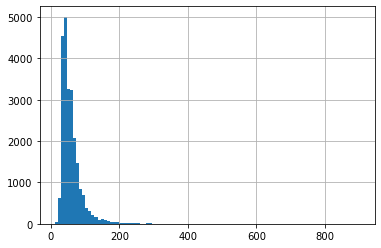

In [27]:
df['total_area'].hist(bins=100) # построение гистограммы

<AxesSubplot:>

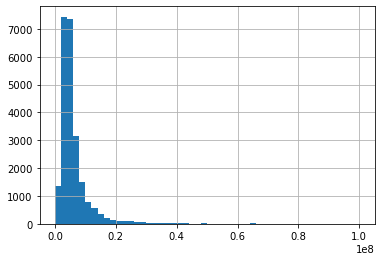

In [28]:
df['last_price'].hist(range=(0,100000000), bins=50) # построение гистограммы

<AxesSubplot:>

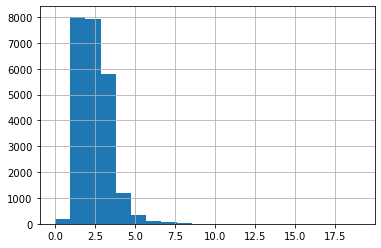

In [29]:
df['rooms'].hist(bins=20) # построение гистограммы

<AxesSubplot:>

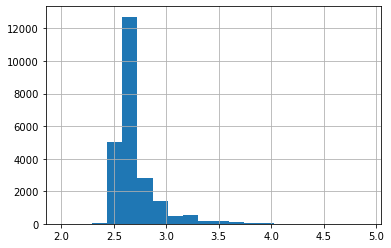

In [30]:
df['ceiling_height'].hist(bins=20) # построение гистограммы

In [31]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,weekday,month,year,ratio_total_area,ratio_kitchen_area
count,23613.000000,2.361300e+04,23613.000000,23613.000000,23612.000000,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000,...,8045.000000,18105.000000,9061.000000,20441.000000,2.361300e+04,23613.000000,23613.000000,23613.000000,23613.0,23613.0
mean,9.874518,6.540555e+06,60.340813,2.071147,2.694233,10.673824,60.340813,5.877313,60.340813,0.593063,...,490.554630,0.770119,518.209469,180.884839,9.939748e+04,2.568035,6.400076,2017.368102,1.0,1.0
std,5.681541,1.090172e+07,35.649048,1.078380,0.221423,6.597173,35.649048,4.873539,35.649048,0.960307,...,341.336698,0.939075,277.887489,219.685543,5.035802e+04,1.788565,3.493160,1.039383,0.0,0.0
min,0.000000,1.219000e+04,12.000000,0.000000,2.000000,1.000000,12.000000,1.000000,12.000000,0.000000,...,1.000000,0.000000,13.000000,1.000000,1.120000e+02,0.000000,1.000000,2014.000000,1.0,1.0
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,40.000000,2.000000,40.000000,0.000000,...,288.000000,0.000000,294.000000,45.000000,7.656200e+04,1.000000,3.000000,2017.000000,1.0,1.0
50%,9.000000,4.650000e+06,52.000000,2.000000,2.640000,9.000000,52.000000,4.000000,52.000000,0.000000,...,455.000000,1.000000,503.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,1.0,1.0
75%,14.000000,6.799000e+06,69.800003,3.000000,2.700000,16.000000,69.800003,8.000000,69.800003,1.000000,...,612.000000,1.000000,730.000000,232.000000,1.142060e+05,4.000000,10.000000,2018.000000,1.0,1.0
max,50.000000,7.630000e+08,900.000000,19.000000,4.900000,60.000000,900.000000,33.000000,900.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.0,1.0


Можно сравнить, значения выводимые функцией `describe()`, и гистограммы. Максимальные, минимальные, средние и медианные значения похожи. Во всех столбцах есть выбивающиеся значения. Графики похожи на распределение Пуассона.

### Исследование количества времени для продажи квартиры

Построим гистограммы для времени продажи квартиры.

<AxesSubplot:>

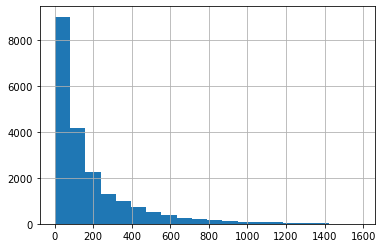

In [32]:
df['days_exposition'].hist(bins=20) # построение гистограммы

Выведим список характерных значений.

In [33]:
df['days_exposition'].describe() # список характерных значений

count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Медиана равна 95, в то время как среднее равно 180, можно сказать, что выбивающиеся большие значения сильно влияют на величину среднего. Обычно продажа занимает 95 дней. По графику и данным можно отметить, что быстрая продажа - это до 45 дней, а долгая - более 232 дней.

### Анализ редких и выбивающихся значений

Построим диаграммы размаха для `days_exposition`, `total_area`, `last_price`, `rooms`, `ceiling_height`, что увидеть редкие и выбивающиеся значения.

<AxesSubplot:>

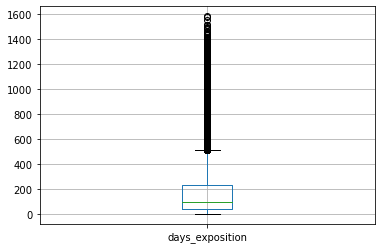

In [34]:
# построение диаграммы размаха
df.boxplot(column='days_exposition')

Видим, что значения выше 500 являются выбросами. Поэтому можно посмотреть на характерные данные для этого диапозона

In [35]:
days_exposition_character = df[df['days_exposition'] < 500] # отброс выбивающихся значений
days_exposition_character['days_exposition'].describe()

count    18694.000000
mean       127.069595
std        119.199647
min          1.000000
25%         41.000000
50%         84.000000
75%        181.000000
max        499.000000
Name: days_exposition, dtype: float64

Видно, что среднее значение стало намного ближе к медиане.

<AxesSubplot:>

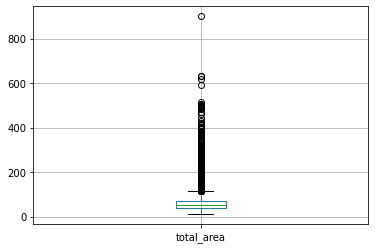

In [36]:
# построение диаграммы размаха
df.boxplot(column='total_area')

Видим, что значения выше 150 являются выбросами. Поэтому можно посмотреть на характерные данные для этого диапазона

In [37]:
total_area_character = df[df['total_area'] < 150] # отброс выбивающихся значений
total_area_character['total_area'].describe()

count    23032.000000
mean        56.467258
std         22.793861
min         12.000000
25%         40.000000
50%         51.000000
75%         67.599998
max        149.600006
Name: total_area, dtype: float64

Среднее и медиана практически совпали.

<AxesSubplot:>

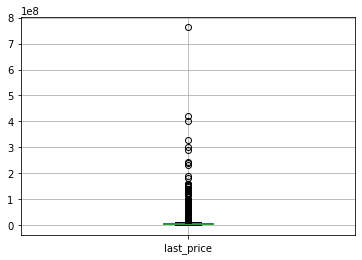

In [38]:
# построение диаграммы размаха
df.boxplot(column='last_price')

Видим, что значения выше 10 000 000 являются выбросами. Поэтому можно посмотреть на характерные данные для этого диапазона

In [39]:
last_price_character = df[df['last_price'] < 10000000] # отброс выбивающихся значений
last_price_character['last_price'].describe()

count    2.084600e+04
mean     4.632736e+06
std      1.948484e+06
min      1.219000e+04
25%      3.300000e+06
50%      4.300000e+06
75%      5.800000e+06
max      9.999999e+06
Name: last_price, dtype: float64

Среднее и медиана практически совпали.

<AxesSubplot:>

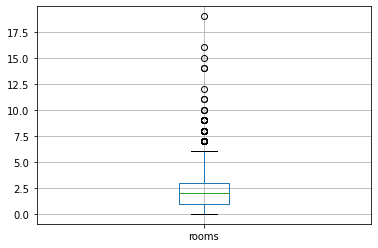

In [40]:
# построение диаграммы размаха
df.boxplot(column='rooms')

Видим, что значения выше 6 являются выбросами. Поэтому можно посмотреть на характерные данные для этого диапазона

In [41]:
rooms_character = df[df['rooms'] < 6]  # отброс выбивающихся значений
rooms_character['rooms'].describe()

count    23419.000000
mean         2.030787
std          0.973577
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

Среднее и медиана практически совпали.

<AxesSubplot:>

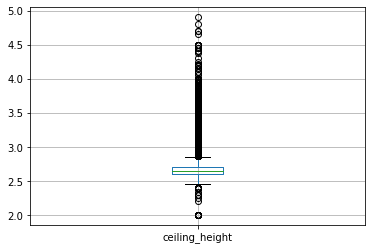

In [42]:
# построение диаграммы размаха
df.boxplot(column='ceiling_height')

Видим, что значения выше 3 являются выбросами. Поэтому можно посмотреть на характерные данные для этого диапазона

In [43]:
ceiling_height_character = df[df['ceiling_height'] < 3] # отброс выбивающихся значений
ceiling_height_character['ceiling_height'].describe()

count    20860.000000
mean         2.628104
std          0.092386
min          2.000000
25%          2.600000
50%          2.640000
75%          2.650000
max          2.990000
Name: ceiling_height, dtype: float64

Среднее и медиана практически совпали.

### Исследование факторов, влияющих на стоимость квартиры

Рассчитаем корреляцию между ценой от площади, числа комнат, удалённости от центра.

In [44]:
display(df[['last_price','total_area']].corr().round(2)) # расчет корреляции между параметрами last_price и total_area
display(df[['last_price','rooms']].corr().round(2)) # расчет корреляции между параметрами last_price и rooms
display(df[['last_price','cityCenters_nearest']].corr().round(2)) # расчет корреляции между параметрами last_price и cityCenters_nearest 

,last_price,total_area
last_price,1.00,0.65
total_area,0.65,1.00


,last_price,rooms
last_price,1.00,0.36
rooms,0.36,1.00


,last_price,cityCenters_nearest
last_price,1.00,-0.21
cityCenters_nearest,-0.21,1.00


Корреляция между количеством комнат и ценой слабая и положительная, между удаленностью от центра и ценой слабая и отрицательная (обратная), а между площадью и ценой средняя и положительная.

Определим, как зависит цена от этажа.

другой       17363
последний     3336
первый        2914
Name: floor_category, dtype: int64


<AxesSubplot:title={'center':'Средняя цена продажи в зависомости от этажа'}, xlabel='floor_category'>

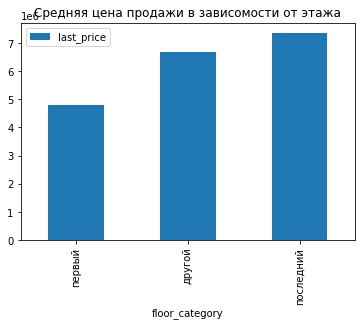

In [45]:
print(df['floor_category'].value_counts())
floor_category_ratio = df.groupby('floor_category')['last_price'].mean().sort_values(ascending=True) # группировска значений по floor_category
floor_category_ratio.plot(x='floor_category', y='last_price', kind='bar', title = 'Средняя цена продажи в зависомости от этажа', legend =True) # построение столбчатой диаграммы

По графику видно, что чем ниже расположена квартира, тем она дешевле.

Определим, как зависит цена от дня недели, когда размещено объявление.

3    4285
1    4170
4    3988
2    3956
0    3602
5    1922
6    1690
Name: weekday, dtype: int64


<AxesSubplot:title={'center':'Средняя цена продажи в зависомости от дня недели'}, ylabel='weekday'>

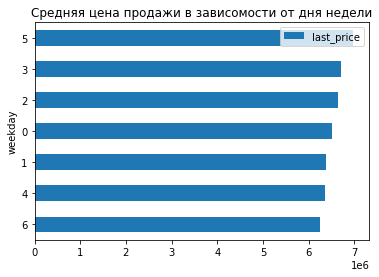

In [46]:
print(df['weekday'].value_counts())
weekday_ratio = df.groupby('weekday')['last_price'].mean().sort_values(ascending=True) # группировска значений по weekday
weekday_ratio.plot(x='floor_category', y='last_price', kind='barh', title = 'Средняя цена продажи в зависомости от дня недели', legend =True) # построение диаграммы

По графику видно, что сильных различий нет.

Определим, как зависит цена от месяца, когда размещено объявление.

2     2637
3     2580
11    2364
4     2362
10    2111
9     1974
6     1752
8     1741
7     1690
12    1641
1     1496
5     1265
Name: month, dtype: int64


<AxesSubplot:title={'center':'Средняя цена продажи в зависомости от месяца'}, ylabel='month'>

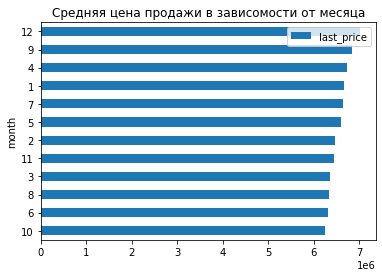

In [47]:
print(df['month'].value_counts()) 
month_ratio = df.groupby('month')['last_price'].mean().sort_values(ascending=True) # группировска значений по month
month_ratio.plot(x='month', y='last_price', kind='barh', title = 'Средняя цена продажи в зависомости от месяца', legend =True) # построение диаграммы

На графике видно, что в декабре стоимость самая высокая, при этом самая низкая стоимость в октябре.

Определим, как зависит цена от года, когда размещено объявление.

2018    8492
2017    8166
2019    2871
2016    2763
2015    1184
2014     137
Name: year, dtype: int64


<AxesSubplot:title={'center':'Средняя цена продажи в зависомости от года'}, ylabel='year'>

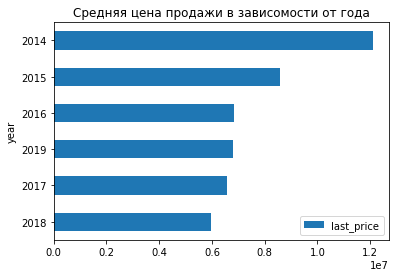

In [48]:
print(df['year'].value_counts())
year_ratio = df.groupby('year')['last_price'].mean().sort_values(ascending=True) # группировска значений по year
year_ratio.plot(x='year', y='last_price', kind='barh', title = 'Средняя цена продажи в зависомости от года', legend =True) # построение диаграммы

Самые дорогие объявления были в 2014 году, возможно, из-за скачак курса доллара.

### Анализ десяти населённых пунктов с наибольшим числом объявлений

Выделим 10 населённых пунктов с наибольшим числом объявлений, затем посчитаем среднюю цену квадратного метра в этих населённых пунктах.

In [49]:
df_10 = df['locality_name'].value_counts().head(10) # вывод 10 населенных пунктов с наибольшим количеством объявлений
print(df_10)
locality_name_top10 = df[df['locality_name'].isin(df_10.index)]   # срез строк по 10 значениям
locality_name_top10_price_meter = locality_name_top10.groupby('locality_name')['price_meter'].mean().sort_values(ascending=False).head(10) # подсчет средней цены квадратного метра для 10 населенных пунктов
locality_name_top10_price_meter

Санкт-Петербург      15651
посёлок Мурино         520
посёлок Шушары         439
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64


locality_name
Санкт-Петербург      114868.874449
Пушкин               103125.818428
деревня Кудрово       92473.588629
посёлок Парголово     90175.886850
посёлок Мурино        85673.253846
посёлок Шушары        78551.357631
Колпино               75424.571006
Гатчина               68746.110749
Всеволожск            68654.474874
Выборг                58141.919831
Name: price_meter, dtype: float64

Самая низкая стоимость жилья в Выборге, а самая высокая в Санкт-Петербурге, что закономерно.

### Анализ изменения цены по степени удалённости от центра

Выделим квартиры в Санкт-Петербурге. Создадим столбец с расстоянием до центра в километрах с округлением до целых значений. В предобработке данных говорили про пропущенные значения в `cityCenters_nearest`, на этом этапе проверим количество пропущенных значений и удалим их, если их доля мала. Также заменим все значения менее 1 километра округлим в большую сторону.

In [50]:
locality_name_sp = df[df['locality_name'].isin(['Санкт-Петербург'])] # выбор квартир в Санкт-Петербург
print(locality_name_sp['cityCenters_nearest'].isna().mean()) # доля пропущенных значений в cityCenters_nearest
locality_name_sp = locality_name_sp.dropna(subset=['cityCenters_nearest']) # удаление пропусков
locality_name_sp['cityCenters_nearest_km'] = locality_name_sp['cityCenters_nearest'] / 1000 # добавление столбца cityCenters_nearest_km
locality_name_sp.loc[locality_name_sp['cityCenters_nearest_km'] < 1, 'cityCenters_nearest_km'] = 1 # замена значений на среднее
locality_name_sp['cityCenters_nearest_km'] = locality_name_sp['cityCenters_nearest_km'].astype('Int64') # изменение типа данных
locality_name_sp

0.003833620854897451


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_meter,weekday,month,year,floor_category,ratio_total_area,ratio_kitchen_area,cityCenters_nearest_km
0,20,13000000,108.000000,2019-03-07,3,2.70,16,108.000000,8,NaN,...,755,<NA>,120370.0,3,3,2019,другой,1.0,1.0,16
2,10,5196000,56.000000,2015-08-20,2,2.60,5,56.000000,4,NaN,...,574,558,92786.0,3,8,2015,другой,1.0,1.0,13
3,0,64900000,159.000000,2015-07-24,3,2.65,14,159.000000,9,NaN,...,234,424,408176.0,4,7,2015,другой,1.0,1.0,6
4,2,10000000,100.000000,2018-06-19,2,3.03,14,100.000000,13,NaN,...,48,121,100000.0,1,6,2018,другой,1.0,1.0,8
7,5,7915000,71.599998,2019-04-18,2,2.60,24,71.599998,22,NaN,...,<NA>,<NA>,110545.0,3,4,2019,другой,1.0,1.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000,35.299999,2018-02-28,1,2.86,15,35.299999,4,NaN,...,652,29,100567.0,2,2,2018,другой,1.0,1.0,16
23690,3,5500000,52.000000,2018-07-19,2,2.60,5,52.000000,2,NaN,...,<NA>,15,105769.0,3,7,2018,другой,1.0,1.0,6
23691,11,9470000,72.900002,2016-10-13,2,2.75,25,72.900002,7,NaN,...,806,519,129904.0,3,10,2016,другой,1.0,1.0,4
23694,9,9700000,133.809998,2017-03-21,3,3.70,5,133.809998,3,NaN,...,381,<NA>,72491.0,1,3,2017,другой,1.0,1.0,4


После этого посчитаем среднюю цену квадратного метра для каждого километра `square_meter_price`. Построим график зависимости средней цены `square_meter_price` от удалённости от центра `cityCenters_nearest_km`. Определим границу, где график сильно меняется. Таким образом определим, какая область входит в центр.

<AxesSubplot:xlabel='cityCenters_nearest_km'>

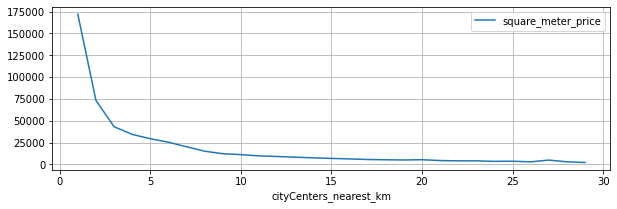

In [51]:
locality_name_sp['square_meter_price'] = locality_name_sp['price_meter'] / locality_name_sp['cityCenters_nearest_km'] # создание столбца square_meter_price
locality_name_sp['square_meter_price'] = locality_name_sp['square_meter_price'].astype('Int64') # изменение типа данных
mean_price_km = locality_name_sp.groupby('cityCenters_nearest_km')['square_meter_price'].mean().astype('Int64') # группировка данных square_meter_price по cityCenters_nearest_km
mean_price_km.plot(x='cityCenters_nearest_km', y='square_meter_price', grid=True, figsize=(10, 3), legend =True) # построение графика

График становится более пологим на границе 8 км - это и будет центральная зона.

### Сравнение выводов по квартирам в центре и общих выводов по всему городу

Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Затем срвним эти показатели с параметрами по общей базе.

In [52]:
center_sp = locality_name_sp[locality_name_sp['cityCenters_nearest_km'] < 8]
center_sp.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_nearest,days_exposition,price_meter,weekday,month,year,ratio_total_area,ratio_kitchen_area,cityCenters_nearest_km,square_meter_price
count,3705.000000,3.705000e+03,3705.000000,3705.000000,3704.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,...,2657.000000,3099.000000,3.705000e+03,3705.000000,3705.000000,3705.000000,3705.0,3705.0,3705.000000,3.705000e+03
mean,10.268016,1.472224e+07,92.245758,2.812686,2.939449,7.243455,92.245758,4.275034,92.245758,0.330364,...,464.175009,245.220394,1.444201e+05,2.526316,6.428880,2017.174089,1.0,1.0,4.219433,4.722729e+04
std,6.007394,2.472347e+07,60.491150,1.456719,0.353607,3.974351,60.491150,3.057527,60.491150,0.768514,...,270.117231,271.603465,9.192280e+04,1.722805,3.460418,1.122217,0.0,0.0,1.709031,6.781918e+04
min,0.000000,1.600000e+06,12.000000,0.000000,2.000000,2.000000,12.000000,1.000000,12.000000,0.000000,...,22.000000,3.000000,1.534500e+04,0.000000,1.000000,2014.000000,1.0,1.0,1.000000,3.069000e+03
25%,6.000000,6.590000e+06,56.000000,2.000000,2.650000,5.000000,56.000000,2.000000,56.000000,0.000000,...,227.000000,60.000000,1.000000e+05,1.000000,3.000000,2017.000000,1.0,1.0,3.000000,2.218500e+04
50%,10.000000,9.000000e+06,77.699997,3.000000,2.830000,6.000000,77.699997,4.000000,77.699997,0.000000,...,450.000000,140.000000,1.236110e+05,3.000000,6.000000,2017.000000,1.0,1.0,4.000000,3.068700e+04
75%,15.000000,1.410000e+07,108.599998,3.000000,3.150000,9.000000,108.599998,5.000000,108.599998,0.000000,...,666.000000,342.000000,1.549550e+05,4.000000,10.000000,2018.000000,1.0,1.0,5.000000,4.649900e+04
max,50.000000,7.630000e+08,900.000000,19.000000,4.900000,27.000000,900.000000,25.000000,900.000000,5.000000,...,1293.000000,1572.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.0,1.0,7.000000,1.736842e+06


In [53]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,weekday,month,year,ratio_total_area,ratio_kitchen_area
count,23613.000000,2.361300e+04,23613.000000,23613.000000,23612.000000,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000,...,8045.000000,18105.000000,9061.000000,20441.000000,2.361300e+04,23613.000000,23613.000000,23613.000000,23613.0,23613.0
mean,9.874518,6.540555e+06,60.340813,2.071147,2.694233,10.673824,60.340813,5.877313,60.340813,0.593063,...,490.554630,0.770119,518.209469,180.884839,9.939748e+04,2.568035,6.400076,2017.368102,1.0,1.0
std,5.681541,1.090172e+07,35.649048,1.078380,0.221423,6.597173,35.649048,4.873539,35.649048,0.960307,...,341.336698,0.939075,277.887489,219.685543,5.035802e+04,1.788565,3.493160,1.039383,0.0,0.0
min,0.000000,1.219000e+04,12.000000,0.000000,2.000000,1.000000,12.000000,1.000000,12.000000,0.000000,...,1.000000,0.000000,13.000000,1.000000,1.120000e+02,0.000000,1.000000,2014.000000,1.0,1.0
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,40.000000,2.000000,40.000000,0.000000,...,288.000000,0.000000,294.000000,45.000000,7.656200e+04,1.000000,3.000000,2017.000000,1.0,1.0
50%,9.000000,4.650000e+06,52.000000,2.000000,2.640000,9.000000,52.000000,4.000000,52.000000,0.000000,...,455.000000,1.000000,503.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,1.0,1.0
75%,14.000000,6.799000e+06,69.800003,3.000000,2.700000,16.000000,69.800003,8.000000,69.800003,1.000000,...,612.000000,1.000000,730.000000,232.000000,1.142060e+05,4.000000,10.000000,2018.000000,1.0,1.0
max,50.000000,7.630000e+08,900.000000,19.000000,4.900000,60.000000,900.000000,33.000000,900.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.0,1.0


Сравним выделенные параметры по характерным значениям. Показатели среднего и медианы в `last_price` в сегменте больше в 2 раза, чем во всей базе. При этом максимальное значение одинаковое, а вот минимальное разное, как и страндартное отклонение. Выводы по `total_area` похожие, за исключением минимальных значений, здесь они одинаковы. В `rooms` значения среднего и медианы также выше в выборке, а `ceiling_height` не сильно отличаются.

Построим гистограммы по выбранным параметрам для выборки центра и сравним их со всей базой.

<AxesSubplot:>

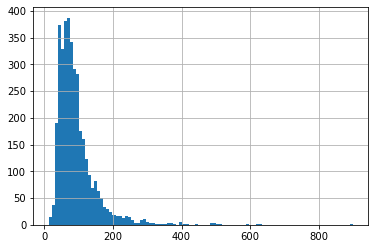

In [54]:
center_sp['total_area'].hist(bins=100) # построение гистограммы

<AxesSubplot:>

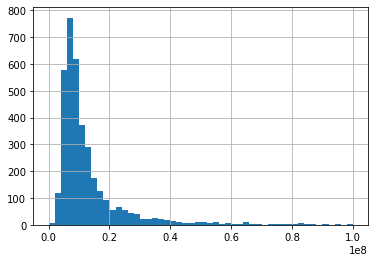

In [55]:
center_sp['last_price'].hist(range=(0,100000000), bins=50) # построение гистограммы

<AxesSubplot:>

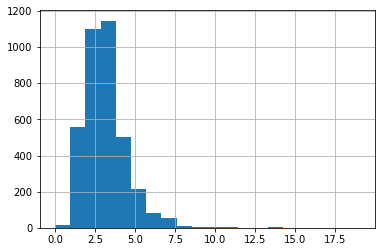

In [56]:
center_sp['rooms'].hist(bins=20) # построение гистограммы

<AxesSubplot:>

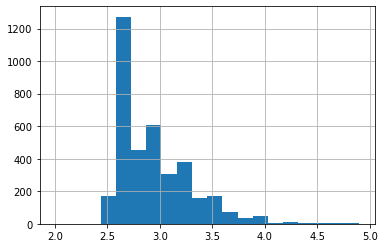

In [57]:
center_sp['ceiling_height'].hist(bins=20) # построение гистограммы

Сравнивая гистограммы для центра и общей базе, видим, что по виуд они практически не отличаются, есть небольшие расхождения по характреным точкам, как говорилось выше.

Рассчитаем корреляцию между ценой от площади, числа комнат, удалённости от центра для выборки.

In [58]:
display(center_sp[['last_price','total_area']].corr().style.background_gradient(axis=None)) # расчет корреляции между параметрами last_price и total_area
display(center_sp[['last_price','rooms']].corr().style.background_gradient(axis=None)) # расчет корреляции между параметрами last_price и rooms
display(center_sp[['last_price','cityCenters_nearest']].corr().style.background_gradient(axis=None)) # расчет корреляции между параметрами last_price и cityCenters_nearest 

,last_price,total_area
last_price,1.000000,0.636563
total_area,0.636563,1.000000


,last_price,rooms
last_price,1.000000,0.333293
rooms,0.333293,1.000000


,last_price,cityCenters_nearest
last_price,1.000000,-0.048395
cityCenters_nearest,-0.048395,1.000000


Корреляция между ценой от площади, числа комнат в районе центра и по общей базе практически идентична, а между ценой и удаленностью от центра различна. В выборке она практически отсутствует. Это можно объяснить тем, что выбран центральный район, а отсекаются все объявления дальше 8 км.

Сравним зависимость цены от этажа, от дня недели, месяца, года для центра и общей базы.

другой       2646
последний     652
первый        407
Name: floor_category, dtype: int64


<AxesSubplot:title={'center':'Средняя цена продажи в зависомости от этажа'}, xlabel='floor_category'>

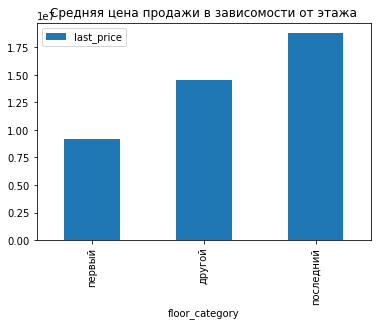

In [59]:
print(center_sp['floor_category'].value_counts())
floor_category_ratio = center_sp.groupby('floor_category')['last_price'].mean().sort_values(ascending=True) # группировска значений по floor_category
floor_category_ratio.plot(x='floor_category', y='last_price', kind='bar', title = 'Средняя цена продажи в зависомости от этажа', legend =True) # построение столбчатой диаграммы

3    762
2    637
1    628
4    627
0    560
5    282
6    209
Name: weekday, dtype: int64


<AxesSubplot:title={'center':'Средняя цена продажи в зависомости от дня недели'}, ylabel='weekday'>

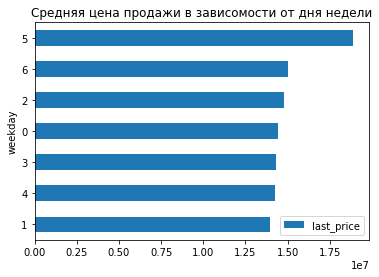

In [60]:
print(center_sp['weekday'].value_counts())
weekday_ratio = center_sp.groupby('weekday')['last_price'].mean().sort_values(ascending=True) # группировска значений по weekday
weekday_ratio.plot(x='floor_category', y='last_price', kind='barh', title = 'Средняя цена продажи в зависомости от дня недели', legend =True) # построение диаграммы

2     406
3     395
11    371
4     348
9     323
10    310
6     302
7     288
8     272
12    256
1     226
5     208
Name: month, dtype: int64


<AxesSubplot:title={'center':'Средняя цена продажи в зависомости от месяца'}, ylabel='month'>

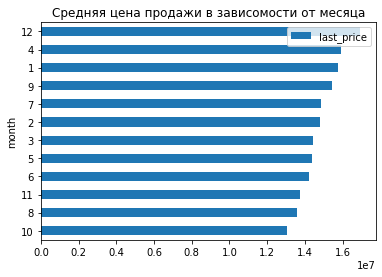

In [61]:
print(center_sp['month'].value_counts()) 
month_ratio = center_sp.groupby('month')['last_price'].mean().sort_values(ascending=True) # группировска значений по month
month_ratio.plot(x='month', y='last_price', kind='barh', title = 'Средняя цена продажи в зависомости от месяца', legend =True) # построение диаграммы

2017    1328
2018    1102
2016     520
2019     400
2015     328
2014      27
Name: year, dtype: int64


<AxesSubplot:title={'center':'Средняя цена продажи в зависомости от года'}, ylabel='year'>

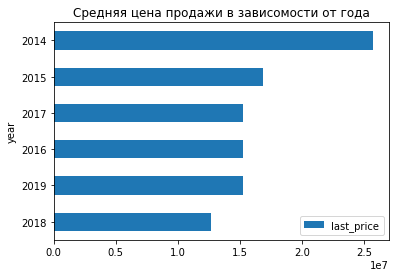

In [62]:
print(center_sp['year'].value_counts())
year_ratio = center_sp.groupby('year')['last_price'].mean().sort_values(ascending=True) # группировска значений по year
year_ratio.plot(x='year', y='last_price', kind='barh', title = 'Средняя цена продажи в зависомости от года', legend =True) # построение диаграммы

Проанализировав эти графики можно сказать, что различия несущественны. Зависимость от этажа такая же, от года минимальная и максимальная цена была в те же годы, день недели с максимальной ценой - суббота, а месяц - декабрь.

### Вывод

Мы изучили и построили гистограммы для площади, цены, число комнат, высоты потолков. Графики похожи на распределения Пуассона. Построив гистограмму для времени продажи квартиры, определили, что обычно продажа занимает 95 дней, быстрая продажа - это до 45 дней, а долгая - более 232 дней. Построив диаграммы размаха для всех этих параметров определили и убрали выбивающиеся значения, после чего медиана и среднее стали ближе друг к другу.

Определили факторы больше всего влияющие на стоимость квартиры. Корреляция между количеством комнат и ценой слабая и положительная, между удаленностью от центра и ценой слабая и отрицательная (обратная), а между площадью и ценой средняя и положительная. Построив графики, определили каким образом этаж и дата размещения объявления влияют на цену.

Выделили 10 населённых пунктов с наибольшим числом объявлений. Для них самая низкая стоимость жилья в Выборге, а самая высокая в Санкт-Петербурге.

Посчитали и выделили центральную зону в Санкт-Петербурге, где стоимость квартир наибольшая. Это - 8 км.

Сравнив параметры для общей базы и центра Санкт-Петербурга, можно заметить, что тенденция, зависимость, вид графиков очень похожи.

## Общий вывод

В ходе исследования необходимо было установить параметры, которые определяют рыночную стоимость объектов недвижимости, а также их влияние.

1. В данных было найдено небольшое количество пропусков и аномалий, часть из которых были устранены. Пропуски в столбцах, которые не влияют на ход исследования, были оставлены.
2. В данные были внесены дополнительные столбцы для более глубокого анализа.
3. В ходе исследования было установлено:     
* в данных есть выбросы, которые влияют на значения среднего и медианы, был сделан срез данных с учетом этих выбросов, характерные значения стали более объективными,    
* корреляция между количеством комнат и ценой (слабая и положительная), между удаленностью от центра и ценой (слабая и отрицательная), между площадью и ценой (средняя и положительная),   
* чем ниже расположена квартира, тем она дешевле, самые дорогие объявления в декабре, самые дорогие квартиры в 2014 году,   
* в 10 населённых пунктов с наибольшим числом объявлений самая низкая стоимость жилья в Выборге, а самая высокая в Санкт-Петербурге,   
* 8 км - центральная зона в Санкт-Петербурге, где стоимость квартир наибольшая,    
* зависимости между общей базой и квратирами в центре Санкт-Петербурга однотипны и похожи.

    